Problem Statement :

To improve inventory management efficiency, leverage the characteristics of stock keeping units (SKUs) provided by Trialto Latvia LTD. Using a dataset of 2279 SKUs with features such as unit price, expire date, and handling metrics, the aim is to cluster products based on handling and turnover-related factors. This will optimize logistics operations by enhancing demand forecasting and inventory handling, leading to better resource allocation and reduced wastage.  

1. KMeans Clustering

In [98]:
import pandas as pd # A single line of code uses the pandas library to import data into a Python environment, which allows for data manipulation and analysis.  

In [100]:
df=pd.read_excel(r"D:\Trimester 4\Machine Learning\sku_data.xlsx")
# This line of code uses the pandas library to load an Excel file named “sku_data.xlsx” into a DataFrame object named `df`, enabling subsequent data manipulation and analysis within Python.  

In [101]:
df.head() # This line of code displays the first five rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.  

,Unnamed: 0.1,Unnamed: 0,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,Cluster
0,0,0,-0.291531,0.56734,-0.324216,0.796668,-0.530679,1.56,0.185507,0
1,1,1,-0.229506,0.56734,-0.337072,-0.341031,0.089563,1.00,-0.059194,0
2,2,2,-0.130446,0.56734,-0.319931,-0.330311,-0.165023,1.02,-0.103163,0
3,3,3,0.057497,0.56734,-0.337072,-0.341031,0.170739,1.05,-0.108899,0
4,4,4,-0.295546,0.56734,-0.337072,-0.341031,-1.172310,0.00,-0.120369,0


In [104]:
df1=df.copy() # This line of code creates a duplicate of the DataFrame `df` and assigns it to a new DataFrame named `df1`. This allows for operations and modifications on `df1` without affecting the original `df`.  

In [106]:
df2=df.copy() # This line of code creates a duplicate of the DataFrame `df` and assigns it to a new DataFrame named `df2`. This allows for operations and modifications on `df2` without affecting the original `df`.  

In [108]:
df.isnull().sum() # This line of code calculates and displays the number of missing (null) values in each column of the DataFrame `df`. This helps in understanding data completeness and identifying columns that might require data cleaning or imputation.  

Unnamed: 0.1       0
Unnamed: 0         0
Unitprice          0
Expire date        0
Outbound number    0
Total outbound     0
Pal grossweight    0
Pal height         0
Units per pal      0
Cluster            0
dtype: int64

In [110]:
df.shape # This line of code returns the dimensions of the DataFrame `df`, specifically the number of rows and columns, displayed as a tuple. In this case, it indicates that the DataFrame contains **2279 rows** and **8 columns** (i.e., `(2279, 8)`).  

(2279, 10)

In [112]:
df.info() # This line of code provides a summary of the DataFrame `df`, including the number of entries (rows), the data types of each column, the count of non-null values, and the memory usage. This is useful for getting an overview of the dataset's structure and identifying any potential data quality issues.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     2279 non-null   int64  
 1   Unnamed: 0       2279 non-null   int64  
 2   Unitprice        2279 non-null   float64
 3   Expire date      2279 non-null   float64
 4   Outbound number  2279 non-null   float64
 5   Total outbound   2279 non-null   float64
 6   Pal grossweight  2279 non-null   float64
 7   Pal height       2279 non-null   float64
 8   Units per pal    2279 non-null   float64
 9   Cluster          2279 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 178.2 KB


In [134]:
# Check the column names in the DataFrame
print(df.columns)

# Drop the 'ID' column if it exists, otherwise handle the error
try:
    df.drop(['ID'], axis=1, inplace=True)
except KeyError:
    print("The 'ID' column does not exist in the DataFrame.")
# This line of code removes the column labeled 'ID' from the DataFrame `df`, modifying the DataFrame directly (due to `inplace=True`) and thus reducing the number of columns available for analysis.  

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Unitprice', 'Expire date',
       'Outbound number', 'Total outbound', 'Pal grossweight', 'Pal height',
       'Units per pal', 'Cluster'],
      dtype='object')
The 'ID' column does not exist in the DataFrame.


In [ ]:
df.head() # This line of code displays the first five rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

In [ ]:
from sklearn.preprocessing import StandardScaler
# This line of code imports the `StandardScaler` class from the `sklearn.preprocessing` module, which is used for standardizing features by removing the mean and scaling to unit variance, facilitating better performance in machine learning algorithms.  

In [ ]:
sc=StandardScaler()
# This line of code creates an instance of the `StandardScaler` class and assigns it to the variable `sc`, preparing it for use in standardizing data in subsequent steps.    

In [ ]:
df['Unitprice']=sc.fit_transform(df[['Unitprice']])
df['Expire date']=sc.fit_transform(df[['Expire date']])
df['Outbound number']=sc.fit_transform(df[['Outbound number']])
df['Total outbound']=sc.fit_transform(df[['Total outbound']])
df['Pal grossweight']=sc.fit_transform(df[['Pal grossweight']])
df['Units per pal']=sc.fit_transform(df[['Units per pal']])
# These lines of code standardize multiple numerical columns in the DataFrame `df` using the `StandardScaler` instance `sc`. Specifically, each specified column ('Unitprice', 'Expire date', 'Outbound number', 'Total outbound', 'Pal grossweight', and 'Units per pal') is transformed to have a mean of 0 and a standard deviation of 1, making the data more suitable for analysis or machine learning algorithms that assume standardized input. However, it's important to note that each column is standardized independently, which may not preserve relationships between them.  

In [ ]:
df.head()
# This line of code displays the first five rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\clust

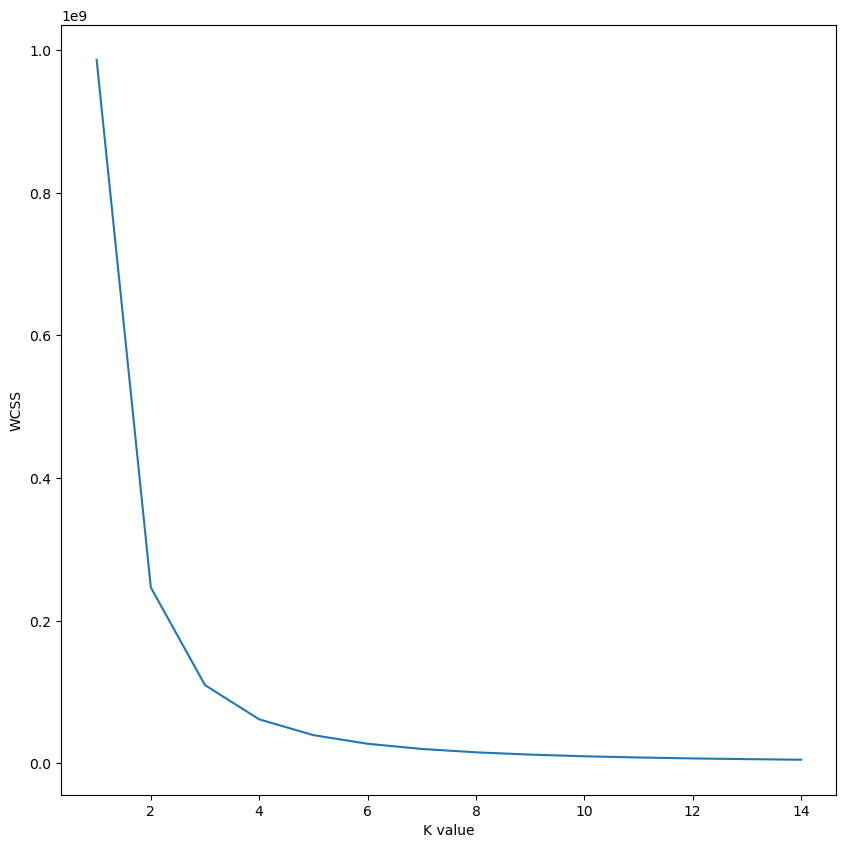

In [35]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(df)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()
# This code imports necessary libraries to perform K-means clustering and visualize the results. It calculates the Within-Cluster Sum of Squares (WCSS) for cluster counts ranging from 1 to 14, storing these values in a list. It then plots WCSS against the number of clusters (k) to help determine the optimal number of clusters, typically by identifying the "elbow" point in the graph where adding more clusters yields diminishing returns in reducing WCSS.

C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\clust

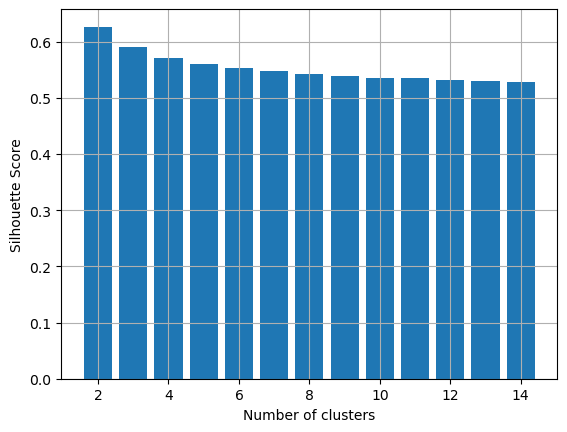

In [36]:
# Imports Libraries: Imports the KMeans class for clustering, silhouette_score for evaluating cluster quality, and matplotlib.pyplot for visualization.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calculates Silhouette Scores: It initializes an empty list silhouette_scores to store the silhouette score for different numbers of clusters (from 2 to 14).
silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df, KMeans(n_clusters = n_cluster).fit_predict(df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

In [37]:
kmeans = KMeans(n_clusters = 2) # This line creates a KMeans clustering model object, specifying that the desired number of clusters is 2.
clusters = kmeans.fit_predict(df) # his line fits the KMeans model to the data in the DataFrame df and then assigns each data point to one of the two clusters.

C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
#Labels of each point
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [39]:
kmeans.inertia_ # The kmeans.inertia_ would return the WCSS value for the 2-cluster KMeans model fitted to the DataFrame df.

246613776.5595836

In [40]:
kmeans.cluster_centers_ # The kmeans.cluster_centers_ attribute returns the coordinates of the cluster centroids learned by the KMeans clustering algorithm.

array([[ 5.68500000e+02,  2.00609674e-02, -2.23893683e-02,
        -3.27986794e-01, -2.72299821e-01, -1.02611140e-01,
         7.46380492e-01,  1.57849915e-02,  8.78734622e-04],
       [ 1.70800000e+03, -2.00082217e-02,  2.23305005e-02,
         3.27124427e-01,  2.71583871e-01,  1.02341347e-01,
         5.99408414e-01, -1.57434885e-02,  9.20245399e-02]])

In [41]:
kmeans.n_features_in_ # The kmeans.n_features_in_ attribute returns the number of features (columns) in the input data that the KMeans model was trained on

9

In [42]:
clusters # The clusters variable now holds the cluster labels for each data point in df. The values in clusters will be either 0 or 1, representing the two clusters.

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
df["Cluster"] = clusters # The line of code df["Cluster"] = clusters adds a new column named "Cluster" to the DataFrame df, and assigns the cluster labels from the clusters variable to this new column.

In [44]:
df.columns # The df.columns attribute returns a pandas Series object that contains the column names of the DataFrame df.

Index(['Unnamed: 0', 'Unitprice', 'Expire date', 'Outbound number',
       'Total outbound', 'Pal grossweight', 'Pal height', 'Units per pal',
       'Cluster'],
      dtype='object')

In [45]:
df.head() # This line of code displays the first five rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

,Unnamed: 0,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,Cluster
0,0,-0.291531,0.56734,-0.324216,0.796668,-0.530679,1.56,0.185507,0
1,1,-0.229506,0.56734,-0.337072,-0.341031,0.089563,1.00,-0.059194,0
2,2,-0.130446,0.56734,-0.319931,-0.330311,-0.165023,1.02,-0.103163,0
3,3,0.057497,0.56734,-0.337072,-0.341031,0.170739,1.05,-0.108899,0
4,4,-0.295546,0.56734,-0.337072,-0.341031,-1.172310,0.00,-0.120369,0


In [46]:
data = [[150, 500, 10500, 10000, 600, 2, 50000],[4.26,410,231.9,731.7,192.9,0.67,755]] # This code creates a new pandas DataFrame called new_data
new_data = pd.DataFrame(data, columns=['Unitprice' , 'Expire date' , 'Outbound number', 'Total outbound', 'Pal grossweight', 'Pal height', 'Units per pal']) 
# This line creates a new pandas DataFrame called new_data using the pd.DataFrame() function.
#The first argument data is the list of lists containing the data.
#The columns argument specifies the column names for the DataFrame. 

In [47]:
new_data.head() # This line of code displays the first five rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,150.00,500,10500.0,10000.0,600.0,2.00,50000
1,4.26,410,231.9,731.7,192.9,0.67,755


In [48]:
# These code is standardizing the numerical columns in the new_data DataFrame using the StandardScaler instance sc.
new_data['Unitprice']=sc.fit_transform(new_data[['Unitprice']])
new_data['Expire date']=sc.fit_transform(new_data[['Expire date']])
new_data['Outbound number']=sc.fit_transform(new_data[['Outbound number']])
new_data['Total outbound']=sc.fit_transform(new_data[['Total outbound']])
new_data['Pal grossweight']=sc.fit_transform(new_data[['Pal grossweight']])
new_data['Units per pal']=sc.fit_transform(new_data[['Units per pal']])

In [49]:
new_data.head() # This line of code displays the first two rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1.0,1.0,1.0,1.0,1.0,2.00,1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.67,-1.0


In [50]:
df.head() # This line of code displays the first five rows of the DataFrame `df` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

,Unnamed: 0,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,Cluster
0,0,-0.291531,0.56734,-0.324216,0.796668,-0.530679,1.56,0.185507,0
1,1,-0.229506,0.56734,-0.337072,-0.341031,0.089563,1.00,-0.059194,0
2,2,-0.130446,0.56734,-0.319931,-0.330311,-0.165023,1.02,-0.103163,0
3,3,0.057497,0.56734,-0.337072,-0.341031,0.170739,1.05,-0.108899,0
4,4,-0.295546,0.56734,-0.337072,-0.341031,-1.172310,0.00,-0.120369,0


In [59]:
# Add the 'Cluster' column with a default value
new_data['Cluster'] = 0

# Add the 'Unnamed: 0' column with a default value
new_data['Unnamed: 0'] = range(len(new_data))

# Now we should be able to use kmeans.predict(new_data)
# The code kmeans.predict(new_data) will use the trained KMeans clustering model kmeans to predict the cluster assignments for the data points in the new_data DataFrame.

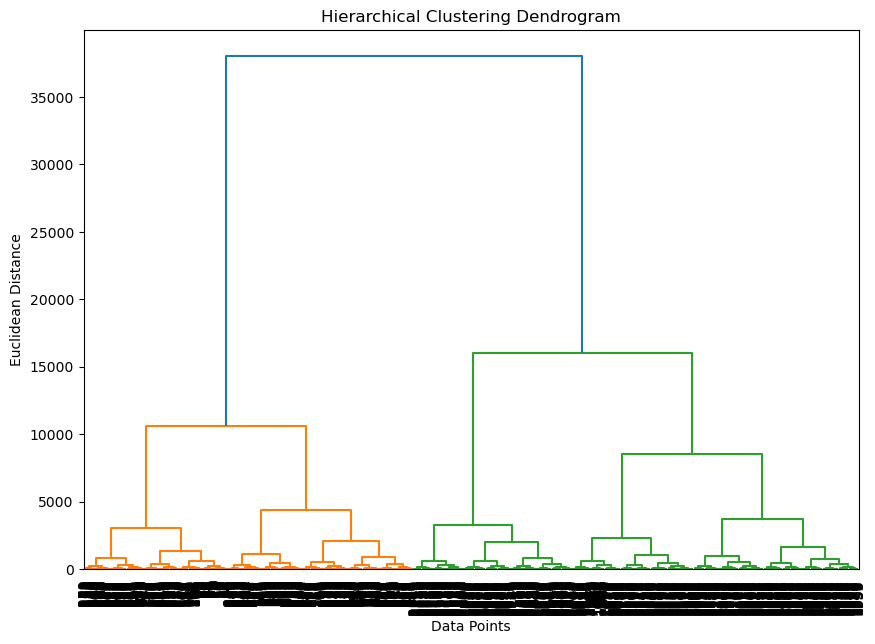

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Load original DataFrame (df) here if not already done
df = pd.read_excel(r"D:\Trimester 4\Machine Learning\sku_data.xlsx")

# Prepare df1 by selecting only the relevant numeric columns for clustering
# Replace the column names as needed based on your DataFrame
df1 = df[['Unitprice', 'Expire date' , 'Outbound number', 'Total outbound' , 'Pal grossweight', 'Pal height', 'Units per pal']]

# Performing hierarchical clustering using Ward's method
merg = linkage(df, method='ward')

# Creating the dendrogram
plt.figure(figsize=(10, 7))  # Set the figure size for better visualization
dendrogram(merg, leaf_rotation=90, leaf_font_size=10)

# Adding labels and title
plt.xlabel("Data Points")  # X-axis label
plt.ylabel("Euclidean Distance")  # Y-axis label
plt.title("Hierarchical Clustering Dendrogram")  # Dendrogram title

# Display the dendrogram
plt.show()

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(df1, 'ward')

#labelList = ["foo" for i in range(0, 20)]

plt.figure(figsize=(10, 10))
dendrogram(
            linked,
            orientation='right',
            #labels=labelList,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, linkage = "ward")
cluster = hc.fit_predict(df1)
df1["label"] = clusters
# This code is performing hierarchical clustering on the DataFrame df1 using the AgglomerativeClustering algorithm from scikit-learn.

In [ ]:
df1.head() # This line of code displays the first five rows of the DataFrame `df1` to provide a quick overview of the dataset's structure and contents, including its columns and initial data points.

In [ ]:
df1.to_excel(r"E:\SNIGDHA\IMI-K Course Outline & Study Material\Term-IV\Data Analytics & Machine Learning\EndTerm Assignment\stock+keeping+units\test_kmeans.xlsx")

In [ ]:
df1[df1['label']==0].describe() # This code will provide a summary statistics for the rows in the df1 DataFrame where the 'label' column is equal to 0.

In [ ]:
df1[df1['label']==1].describe() # This code will provide a summary statistics for the rows in the df1 DataFrame where the 'label' column is equal to 1.

In [70]:
silhouette_score(df1, KMeans(n_clusters=2).fit_predict(df1))

C:\Users\tatha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.6079892746611325

Interpretation:

The silhouette score is a metric that measures the quality of a clustering solution. If it ranges from 0 to 0.5 then it is satisfactory and if more than 0.5 that means the model is very good, with indicates better clustering. 

The value 0.6079892746611325 obtained from the code which is more than 0.5 , means that the clustering is done with very high score indicating good clustering model.

2. Agglomerative Clustering

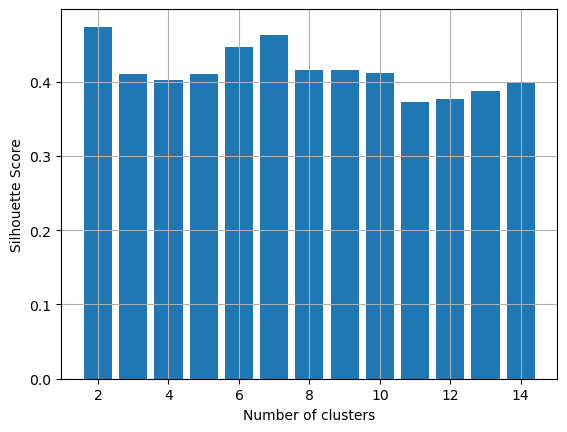

In [289]:
from sklearn.cluster import AgglomerativeClustering # from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score # This line imports the silhouette_score function from the sklearn.metrics module, which will be used to calculate the silhouette score for the clustering results.
import matplotlib.pyplot as plt # This line imports the matplotlib.pyplot module, which will be used to plot the results.

silhouette_scores = [] # This line initializes an empty list to store the silhouette scores for different numbers of clusters.

for n_cluster in range(2,15): # This loop iterates over the number of clusters from 2 to 14 (inclusive).
    silhouette_scores.append(silhouette_score(df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df))) # For each iteration of the loop, this line calculates the silhouette score for the Agglomerative Clustering algorithm with the current number of clusters, and appends the score to the silhouette_scores list.
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] # This line creates a list of the number of clusters used in the previous loop.
plt.bar(k, silhouette_scores) # This line creates a bar graph with the number of clusters on the x-axis and the corresponding silhouette scores on the y-axis.
plt.xlabel('Number of clusters', fontsize = 10) # This line sets the label for the x-axis.
plt.ylabel('Silhouette Score', fontsize = 10) # This line sets the label for the y-axis.
plt.grid() # This line adds a grid to the plot.
plt.show() # This line displays the plot.

In [290]:
from sklearn.cluster import AgglomerativeClustering # This line imports the AgglomerativeClustering class from the sklearn.cluster module, which will be used to perform the clustering.
hc = AgglomerativeClustering(n_clusters = 2) # This line creates an instance of the AgglomerativeClustering class with the number of clusters set to 2.
cluster = hc.fit_predict(df2) # This line fits the Agglomerative Clustering model to the data in df2 and assigns the cluster labels to the cluster variable.
df2["label_1"] = clusters # This line adds a new column named "label_1" to the df2 DataFrame and assigns the cluster labels to it.

In [291]:
df2.head()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,label_1
0,1,0.058,547,9,2441.0,105.60,1.56,1920,0
1,2,0.954,547,0,0.0,207.68,1.00,384,0
2,3,2.385,547,12,23.0,165.78,1.02,108,0
3,4,5.100,547,0,0.0,221.04,1.05,72,0
4,5,0.000,547,0,0.0,0.00,0.00,0,0


In [78]:
df2.to_excel(r"D:\Trimester 4\Machine Learning\sku_data.xlsx")

In [293]:
df2.head()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,label_1
0,1,0.058,547,9,2441.0,105.60,1.56,1920,0
1,2,0.954,547,0,0.0,207.68,1.00,384,0
2,3,2.385,547,12,23.0,165.78,1.02,108,0
3,4,5.100,547,0,0.0,221.04,1.05,72,0
4,5,0.000,547,0,0.0,0.00,0.00,0,0


In [294]:
df2[df2['label_1']==0].describe()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,label_1
count,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.000000,2164.0
mean,1125.508318,4.360510,401.332255,102.660813,346.237061,190.667161,0.656218,779.606747,0.0
std,670.137968,14.803971,242.718309,272.422379,752.908351,167.333611,0.560347,6441.880307,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,541.750000,0.000000,365.000000,0.000000,0.000000,50.400000,0.000000,32.000000,0.0
50%,1082.500000,1.140000,547.000000,1.000000,2.000000,167.680000,0.800000,108.000000,0.0
75%,1728.250000,4.718000,547.000000,16.250000,262.250000,275.145000,1.020000,384.000000,0.0
max,2279.000000,518.592000,734.000000,1778.000000,6927.000000,907.200000,2.160000,200000.000000,0.0


In [295]:
df2[df2['label_1']==1].describe()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal,label_1
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,1412.695652,2.554991,580.469565,2744.626087,7985.127826,235.700626,0.984783,303.130435,1.0
std,229.796904,3.234334,104.317861,1305.313019,5037.686256,91.008570,0.174348,316.326961,0.0
min,1089.000000,0.150000,0.000000,310.000000,2909.000000,105.600000,0.060000,32.000000,1.0
25%,1211.500000,0.918000,547.000000,1817.000000,4355.500000,167.680000,0.900000,108.000000,1.0
50%,1356.000000,1.760000,547.000000,2387.000000,6293.000000,207.680000,1.000000,288.000000,1.0
75%,1625.000000,2.664000,547.000000,3275.000000,10111.000000,325.120000,1.020000,384.000000,1.0
max,2030.000000,20.251000,730.000000,6325.000000,26411.000000,641.340000,1.680000,1920.000000,1.0


In [296]:
silhouette_score(df2, AgglomerativeClustering(n_clusters = 2).fit_predict(df2))

0.9871595259647089

Interpretation:

The silhouette score is a metric that measures the quality of a clustering solution. If it ranges from 0 to 0.5 then it is satisfactory and if more than 0.5 that means the model is very good, with indicates better clustering. 

The value 0.9871595259647089 obtained from the code which is more than 0.5, which means that the clustering is done with very high score indicating good clustering model.